# Data Cleaning Process
In this notebook, you will find the data cleaning methods I applied to the datasets before training the models. The cleaning steps are crucial to ensure the quality of the data and to enhance the performance of the model. These steps include handling missing values, removing irrelevant columns, and preparing the dataset for model training.

_This notebook was created by Huma Raja Liaqat_



- **Importing the pandas library:** The code begins by importing the pandas library, which is a powerful data manipulation and analysis tool in Python. It is commonly used for handling structured data, such as data frames.

- **Importing the matplotlib.pyplot module:** Next, the code imports matplotlib.pyplot, a widely used library for creating static, animated, and interactive visualizations in Python. Pyplot provides functions to generate various plots like line charts, bar graphs, and more.

- **Importing the seaborn library:** The seaborn library is imported next. Seaborn is built on top of matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics, making it easier to create aesthetically pleasing visualizations with less code.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This code reads the 'microsoft_stock.csv' file into a pandas DataFrame (df). It uses the first two rows as column headers (header=[0, 1]) and sets the first column as the index (index_col=0).

In [31]:
data = 'microsoft_stock.csv' 
df = pd.read_csv(data, header=[0,1], index_col=0) 

This is the structure of a CSV file containing Microsoft stock data. The first row specifies the columns: "Price", "Adj Close", "Close", "High", "Low", "Open", and "Volume". The second row contains the ticker symbol (MSFT), indicating that the data is for Microsoft Inc. The "Date" column would typically hold the date values for each stock entry, although the example doesn't show the full data.

In [32]:
df.columns

MultiIndex([('Adj Close', 'MSFT'),
            (    'Close', 'MSFT'),
            (     'High', 'MSFT'),
            (      'Low', 'MSFT'),
            (     'Open', 'MSFT'),
            (   'Volume', 'MSFT')],
           names=['Price', 'Ticker'])

This code renames the columns of the DataFrame df. It checks if the first part of the column name is `Unnamed`, and if so, it keeps the second part of the name. Otherwise, it combines the first and second parts of the column names with an underscore. After renaming, it prints the first few rows of the dataset using df.head().

In [33]:
df.columns = [col[1] if 'Unnamed' in col[0] else f"{col[0]}_{col[1]}" for col in df.columns]
print("\nFirst rows of dataset:")
df.head()


First rows of dataset:


,Adj Close_MSFT,Close_MSFT,High_MSFT,Low_MSFT,Open_MSFT,Volume_MSFT
Date,,,,,,
1986-03-13,0.059827,0.097222,0.101563,0.088542,0.088542,1031788800
1986-03-14,0.061963,0.100694,0.102431,0.097222,0.097222,308160000
1986-03-17,0.063032,0.102431,0.103299,0.100694,0.100694,133171200
1986-03-18,0.061429,0.099826,0.103299,0.098958,0.102431,67766400
1986-03-19,0.060361,0.098090,0.100694,0.097222,0.099826,47894400


The `df.describe()` function generates summary statistics for the numerical columns in the DataFrame `df`. It provides measures such as:

- Count
- Mean
- Standard deviation
- Minimum and maximum values
- Quartiles (25th, 50th, and 75th percentiles)

This is useful for quickly understanding the distribution and central tendencies of the numerical features in the dataset.


In [35]:
df.describe()

,Adj Close_MSFT,Close_MSFT,High_MSFT,Low_MSFT,Open_MSFT,Volume_MSFT
count,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9.695000e+03
mean,53.465715,59.258366,59.851755,58.618561,59.244632,5.669312e+07
std,91.463811,91.676313,92.503447,90.752999,91.659141,3.813638e+07
min,0.055554,0.090278,0.092014,0.088542,0.088542,2.304000e+06
25%,3.519103,5.718750,5.796875,5.640625,5.718750,3.193185e+07
50%,19.138813,27.360001,27.629999,27.110001,27.340000,4.983530e+07
75%,38.517281,46.789999,47.349998,46.269999,46.812500,7.061690e+07
max,465.786438,467.559998,468.350006,464.459991,467.000000,1.031789e+09


The `df.info()` function provides a concise summary of the DataFrame `df`. It displays:

1. The number of entries (rows).
2. The column names.
3. The data type of each column.
4. The number of non-null (non-missing) values in each column.

This helps you quickly assess the structure and completeness of the dataset.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9695 entries, 1986-03-13 to 2024-08-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close_MSFT  9695 non-null   float64
 1   Close_MSFT      9695 non-null   float64
 2   High_MSFT       9695 non-null   float64
 3   Low_MSFT        9695 non-null   float64
 4   Open_MSFT       9695 non-null   float64
 5   Volume_MSFT     9695 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 530.2+ KB


1. **Boxplot for Selected Columns**:
   - The code generates a **boxplot** for selected columns: `Adj Close_MSFT`, `Close_MSFT`, `High_MSFT`, `Low_MSFT`, and `Volume_MSFT`.
   - The boxplot is used to visualize the distribution of values in these columns and helps in identifying **outliers**.
   - The box represents the interquartile range (IQR), while the whiskers indicate the range of values, excluding outliers.

2. **Line Plot for Each Column**:
   - For each column in the DataFrame, a **line plot** is created to show how the values in each column change over time.
   - These plots are helpful to observe the **trends and patterns** in the stock data over the given period.
   - `plt.tight_layout()` ensures that the plots are displayed neatly without overlapping.

These visualizations provide insights into the data's distribution and time-based trends, which are important for stock analysis.

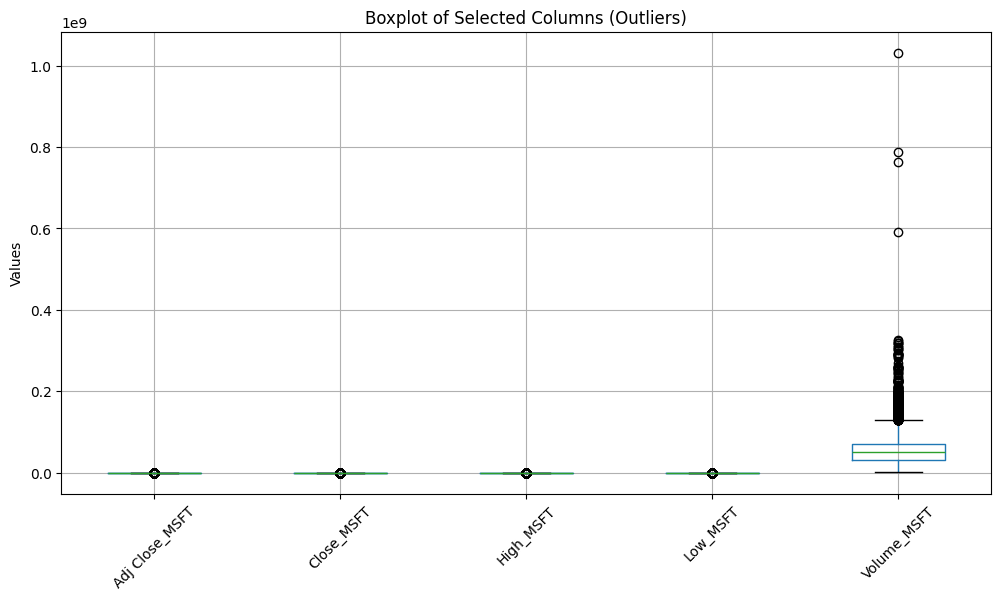

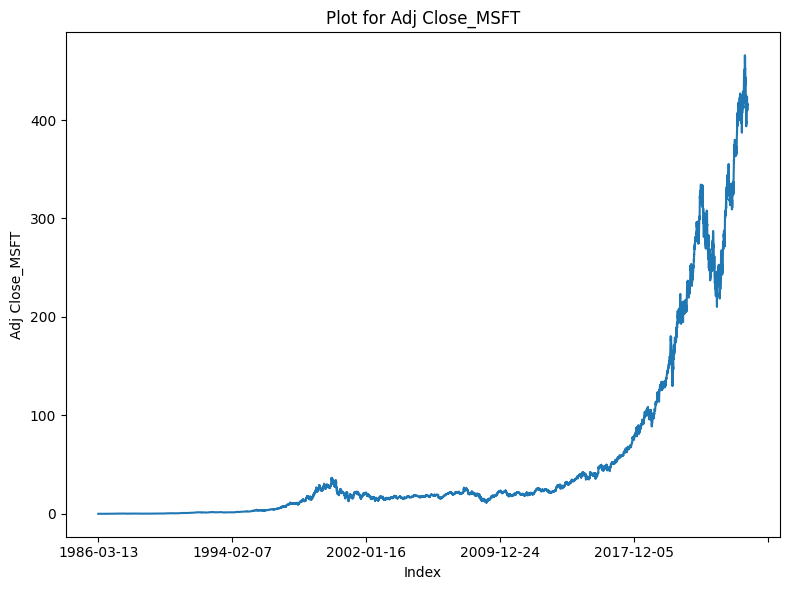

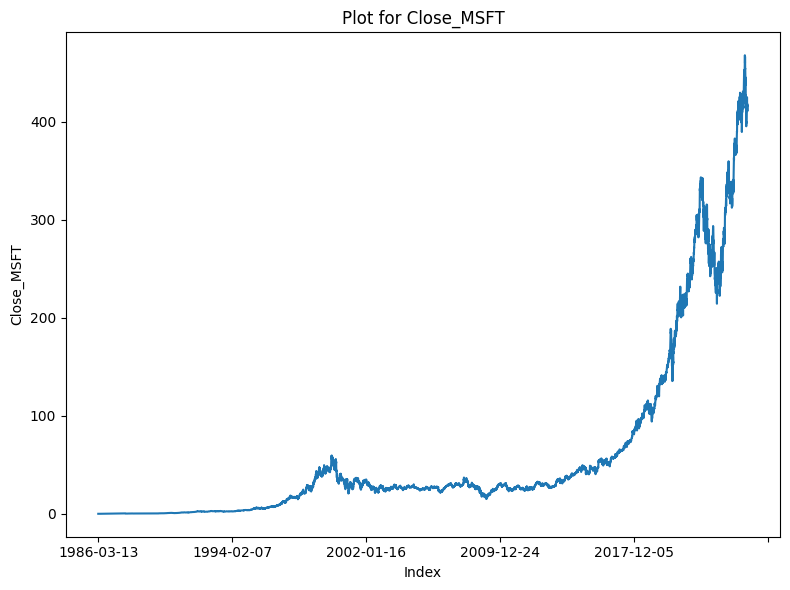

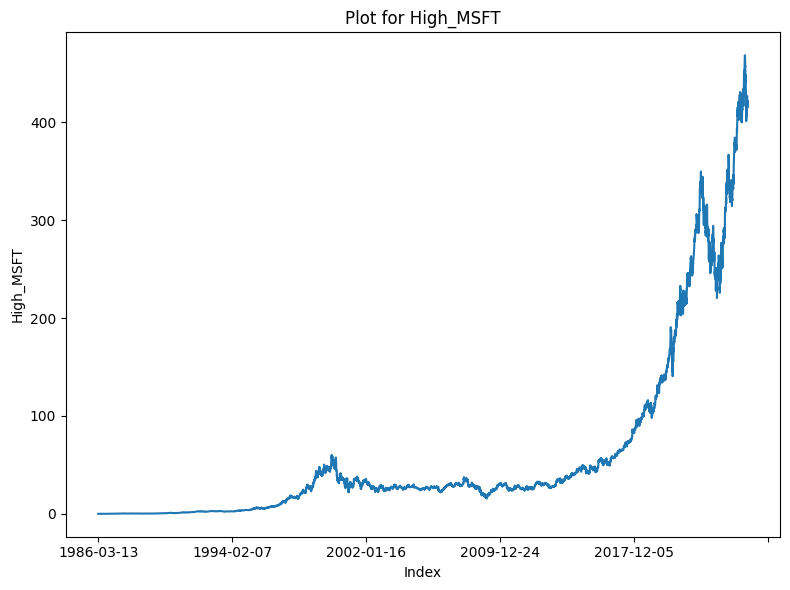

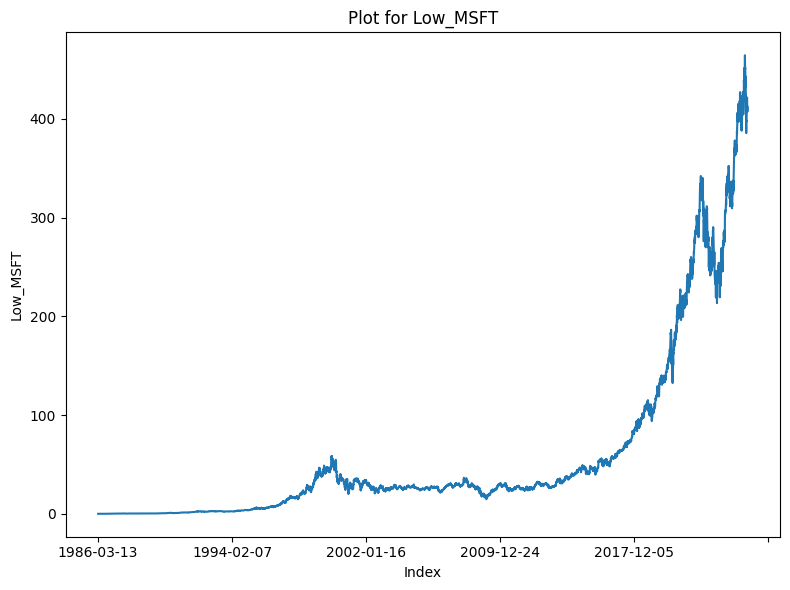

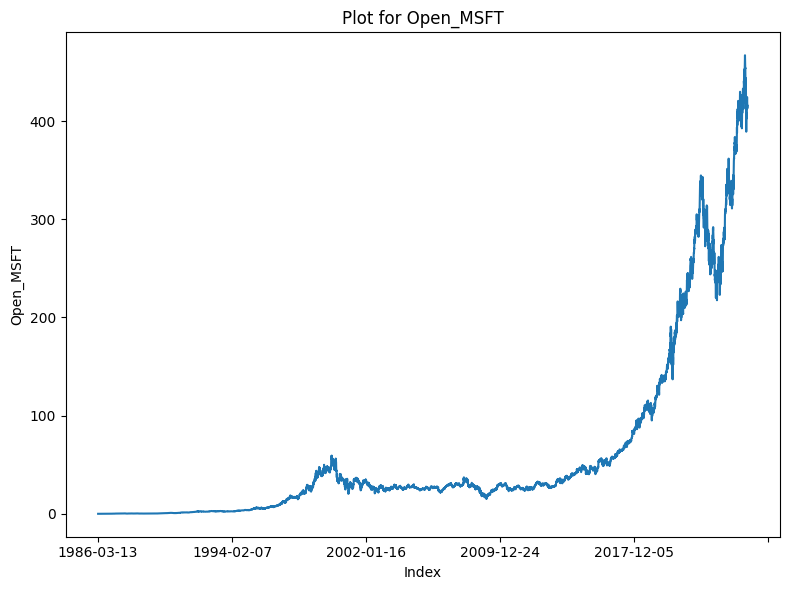

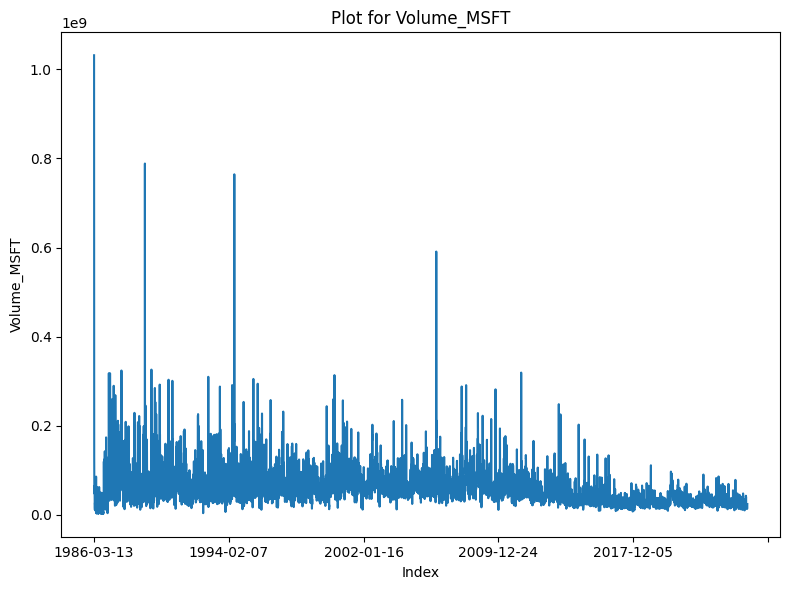

In [37]:
columns_to_analyze = ['Adj Close_MSFT', 'Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Volume_MSFT']

plt.figure(figsize=(12, 6))
df[columns_to_analyze].boxplot()
plt.title('Boxplot of Selected Columns (Outliers)')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

for column in df.columns:
    plt.figure(figsize=(8, 6))  
    df[column].plot(kind='line') 
    plt.title(f"Plot for {column}") 
    plt.xlabel('Index') 
    plt.ylabel(column)  
    plt.tight_layout()  
    plt.show() 

1. **Calculating the IQR**:
   - The code first calculates the **first quartile (Q1)** and the **third quartile (Q3)** of the dataset using the `quantile()` function.
   - **Interquartile Range (IQR)** is then calculated by subtracting Q1 from Q3, which gives the spread of the middle 50% of the data.

2. **Identifying and Removing Outliers**:
   - Outliers are identified as values that fall outside the range: 
     - **Lower Bound**: `Q1 - 1.5 * IQR`
     - **Upper Bound**: `Q3 + 1.5 * IQR`
   - The code filters out rows where any column value is outside this range, effectively removing the outliers.
   
3. **Displaying the Cleaned Data**:
   - The `info()` function is used to display the summary of the cleaned dataset after outlier removal, including the number of remaining rows and columns.

This method ensures that extreme values (outliers) do not disproportionately affect the data analysis or model performance.

In [38]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_no_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7746 entries, 1986-03-18 to 2018-12-24
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close_MSFT  7746 non-null   float64
 1   Close_MSFT      7746 non-null   float64
 2   High_MSFT       7746 non-null   float64
 3   Low_MSFT        7746 non-null   float64
 4   Open_MSFT       7746 non-null   float64
 5   Volume_MSFT     7746 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 423.6+ KB
None


1. **Boxplot After Outlier Removal**:
   - A **boxplot** is created for the dataset after removing the outliers. This allows us to visually inspect the distribution of the data, ensuring that extreme values are no longer present in the data.
   - The boxplot provides a summary of the central tendency, spread, and potential outliers (which should now be absent).

2. **Line Plots for Each Column**:
   - For each column in the cleaned dataset (`df_no_outliers`), a **line plot** is generated to show the trend of the values over time (or index).
   - These line plots allow us to visually observe the changes and trends in the data, ensuring no further unusual patterns remain after outlier removal.
   
   Each plot is generated dynamically for each column in the dataset, adjusting the layout to avoid overlapping labels.

This visualization helps confirm that the data is now more consistent and free of outliers, making it suitable for further analysis or modeling.

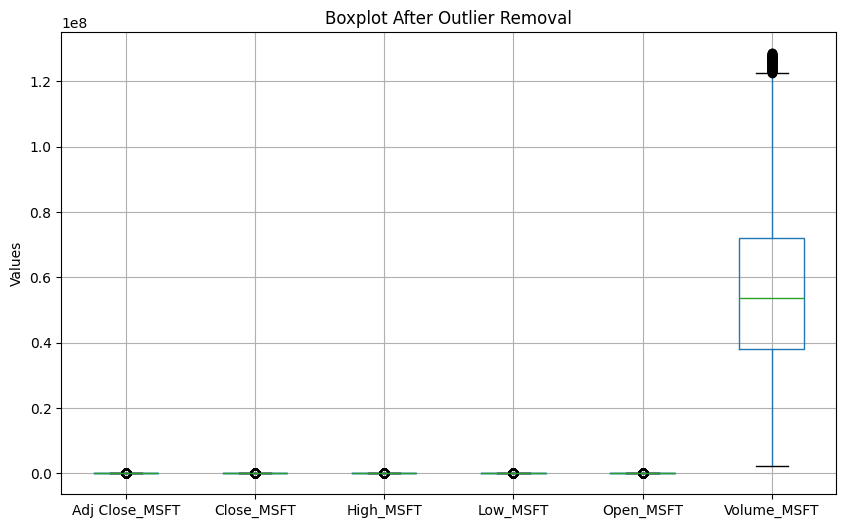

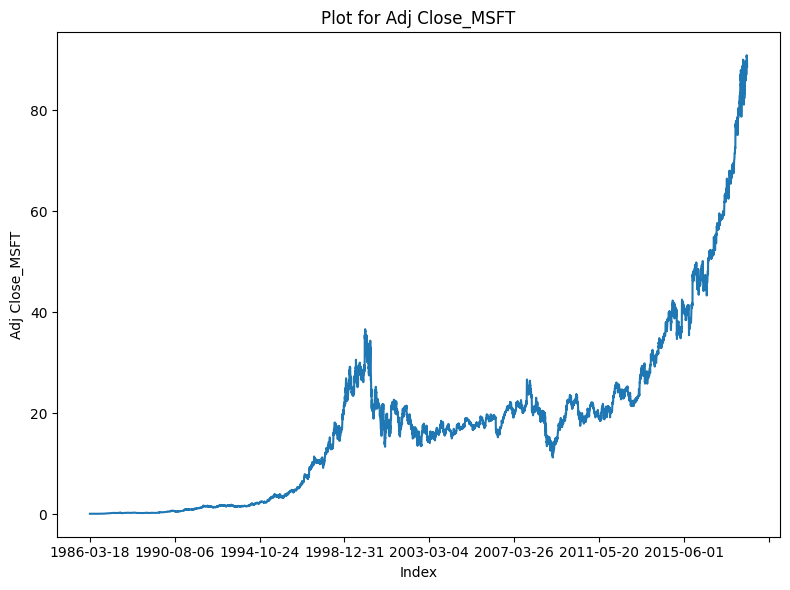

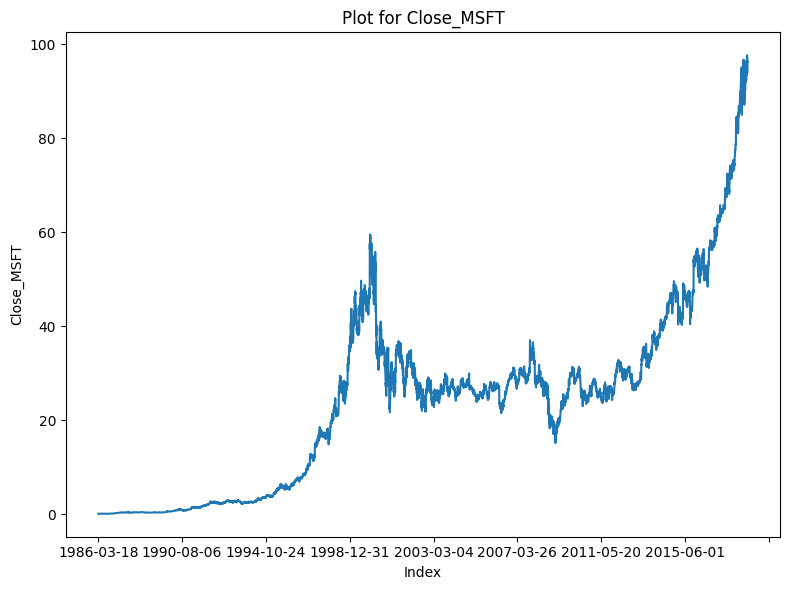

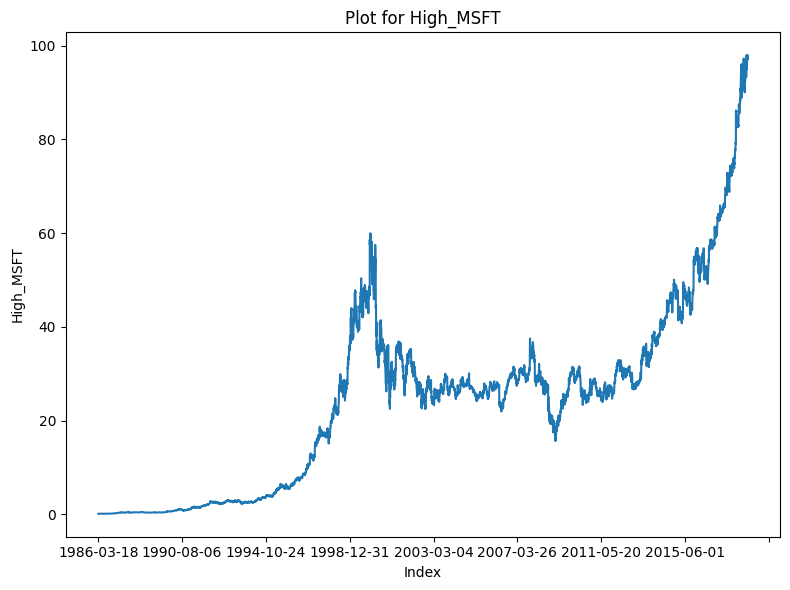

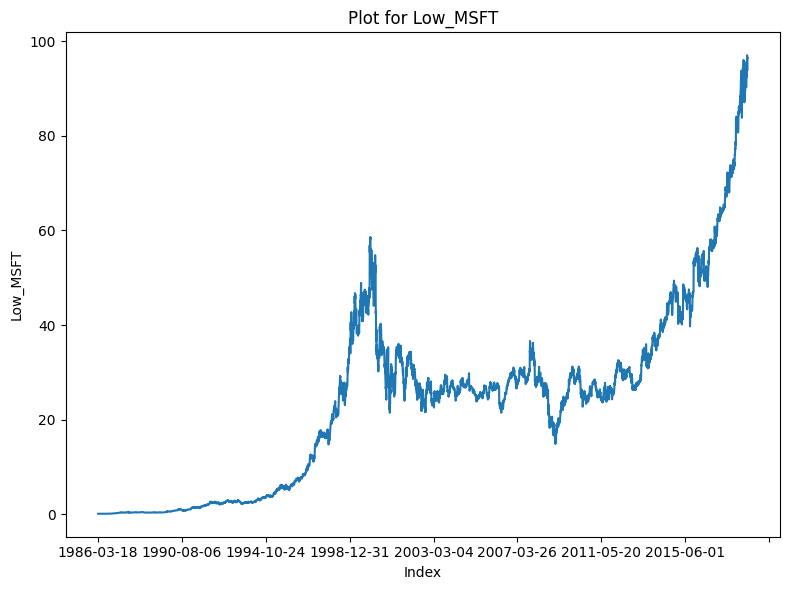

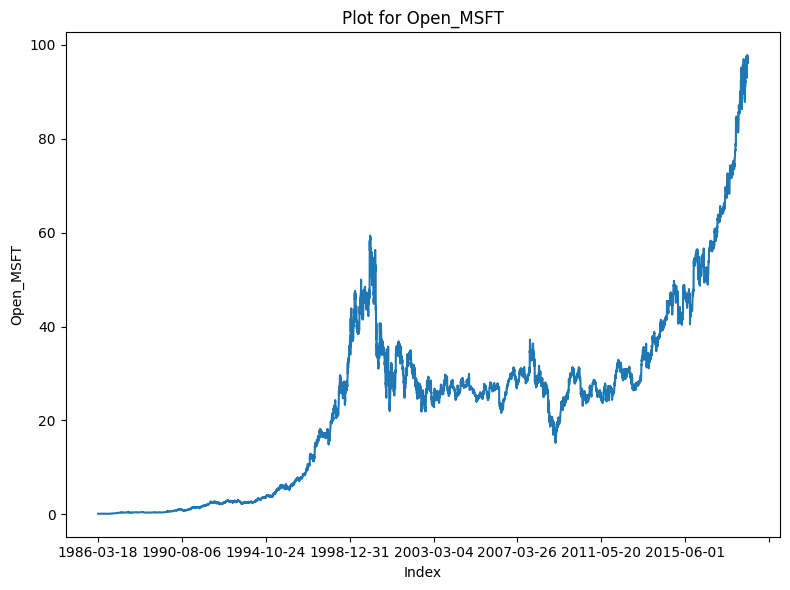

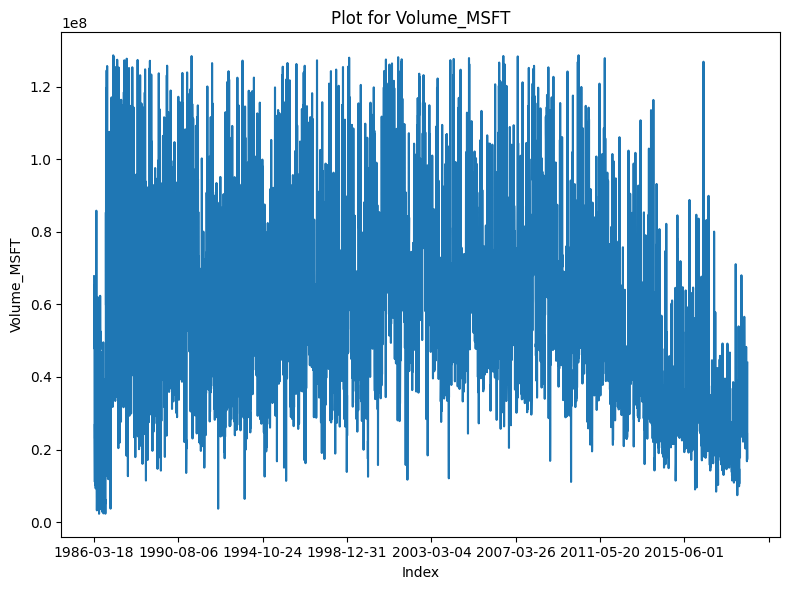

In [39]:
plt.figure(figsize=(10, 6))
df_no_outliers.boxplot()
plt.title("Boxplot After Outlier Removal")
plt.ylabel("Values")
plt.show()

for column in df.columns:
    plt.figure(figsize=(8, 6)) 
    df_no_outliers[column].plot(kind='line') 
    plt.title(f"Plot for {column}") 
    plt.xlabel('Index')
    plt.ylabel(column) 
    plt.tight_layout() 
    plt.show()  

1. **Z-Score Calculation**:
   - The **z-scores** are calculated for the numeric columns in the dataset (columns with `float64` or `int64` types). The z-score measures how many standard deviations a data point is away from the mean of the dataset.
   - This is done using the `stats.zscore` function from the `scipy` library, which helps identify extreme values or outliers.

2. **Absolute Z-Scores**:
   - The **absolute z-scores** are computed to focus on the magnitude of deviation, irrespective of whether the value is above or below the mean.

3. **Outlier Threshold**:
   - A threshold of `3` is used, meaning any data point with a z-score greater than `3` or less than `-3` is considered an outlier. This is a commonly used rule to identify extreme outliers.

4. **Filtering the Data**:
   - The dataset is filtered to remove rows where any of the columns have a z-score greater than `3` in absolute value. The resulting dataset, `df_no_outliers`, contains only the rows where all the values have z-scores within the acceptable range.

5. **Shape of the Cleaned Data**:
   - The shape of the cleaned dataset (`df_no_outliers`) is printed to give us an overview of how many rows were retained after outlier removal.

This method is useful for detecting and removing extreme outliers in the dataset, ensuring that the data is more normally distributed and suitable for further analysis.

In [40]:
""" z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)

threshold = 3

df_no_outliers = df[(abs_z_scores < threshold).all(axis=1)]

print(df_no_outliers.shape) """


" z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))\nabs_z_scores = abs(z_scores)\n\nthreshold = 3\n\ndf_no_outliers = df[(abs_z_scores < threshold).all(axis=1)]\n\nprint(df_no_outliers.shape) "

1. **Standardizing Column Names**:
   - The **column names** of the DataFrame `df_no_outliers` are converted to **lowercase** using the `str.lower()` method. This ensures consistency and avoids issues with case sensitivity when referencing columns later in the analysis.

2. **Standardizing Index Name**:
   - The **index name** (which is the name of the row labels in the DataFrame) is also converted to lowercase using the `index.name.lower()` method. This is helpful for consistency, especially if we plan to perform operations that rely on a consistent naming convention.

3. **Output**:
   - The updated column names and the index name are printed using `df_no_outliers.columns` and `df_no_outliers.index.name` respectively, so we can verify that the changes have been successfully applied.

By standardizing the column and index names, we ensure that the DataFrame is easier to work with and less prone to errors related to case sensitivity during subsequent analysis.

In [41]:
df_no_outliers.columns = df_no_outliers.columns.str.lower()

df_no_outliers.index.name = df_no_outliers.index.name.lower()

print(df_no_outliers.columns)  
print("Index Name:", df_no_outliers.index.name) 

Index(['adj close_msft', 'close_msft', 'high_msft', 'low_msft', 'open_msft',
       'volume_msft'],
      dtype='object')
Index Name: date


1. **Calculating the Correlation Matrix**:
   - The **correlation matrix** is calculated using `df_no_outliers.corr()`. This matrix shows the pairwise correlation coefficients between the numeric columns of the DataFrame. The correlation coefficient ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value close to 0 indicates no linear correlation.

2. **Plotting the Correlation Heatmap**:
   - We use the **seaborn library** (`sns.heatmap`) to create a heatmap visualization of the correlation matrix. The `annot=True` argument adds the correlation values inside the heatmap cells, making it easier to interpret the results. 
   - The `cmap='magma'` argument sets the color palette to "magma", which is a perceptually uniform color map, meaning that it does not distort the perception of data values. The `fmt='.2f'` ensures that the correlation values are displayed with two decimal places. 
   - The `linewidths=0.5` adds small borders between the heatmap cells for better visual separation.

3. **Display the Plot**:
   - The title `'Correlation Heatmap'` is added using `plt.title`, and the plot is adjusted using `plt.tight_layout()` to make sure everything fits neatly.
   - Finally, `plt.show()` displays the heatmap plot.

- This heatmap helps in visualizing the relationships between different variables, making it easier to detect patterns and understand how variables are correlated with each other in the dataset.

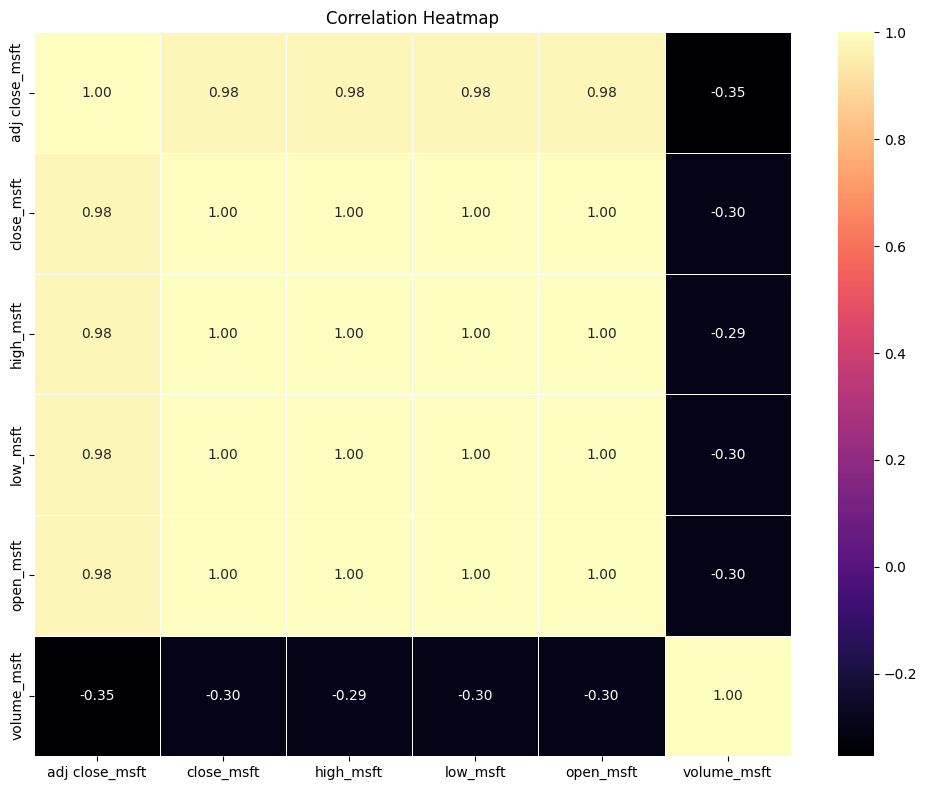

In [42]:
corr_matrix = df_no_outliers.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

The `df_no_outliers.to_csv('MSFT_cleaned_data.csv')` command saves the cleaned dataset (with outliers removed) to a new CSV file named `MSFT_cleaned_data.csv` for future use or analysis.

In [43]:
df_no_outliers.to_csv('MSFT_cleaned_data.csv')